# Praca Domowa #3

In [1]:
import math
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml, make_blobs, load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, mean_squared_error

## Zadanie 1
### Regresja
Ponownie wykorzystamy zbiór danych dotyczący cen mieszkań w Bostonie. Zadanie polega na ocenieniu, które z cech najbardziej nadają się do przewidywania mediany cen, następnie wykorzystaniu algorytmów: drzewa regresji (*DecisionTreeRegressor*) oraz Maszyny Wektorów Nośnych (SVM, a konkretnie SVR czyli Support Vector Regression) do przewidywania wartości mediany cen.

Czynności, które należy wykonać to kolejno:

1. Załadowanie zbioru danych
2. Wytypowanie 5 najbardziej obiecujących cech
3. Przygotowanie zbioru danych, zawierającego wybrane cechy, podział na zbiory uczący i testowy
4. Trening i ewaluacja drzewa regresji
5. Trening i ewaluacja SVRa
6. Zastanów się jakie płyną z tego wnioski

In [3]:
#1 Załaduj zbiór dotyczący cen mieszkań w Bostonie, zadbaj o to, żeby etykieta (MEDV) również znalazła się w DataFramie
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target

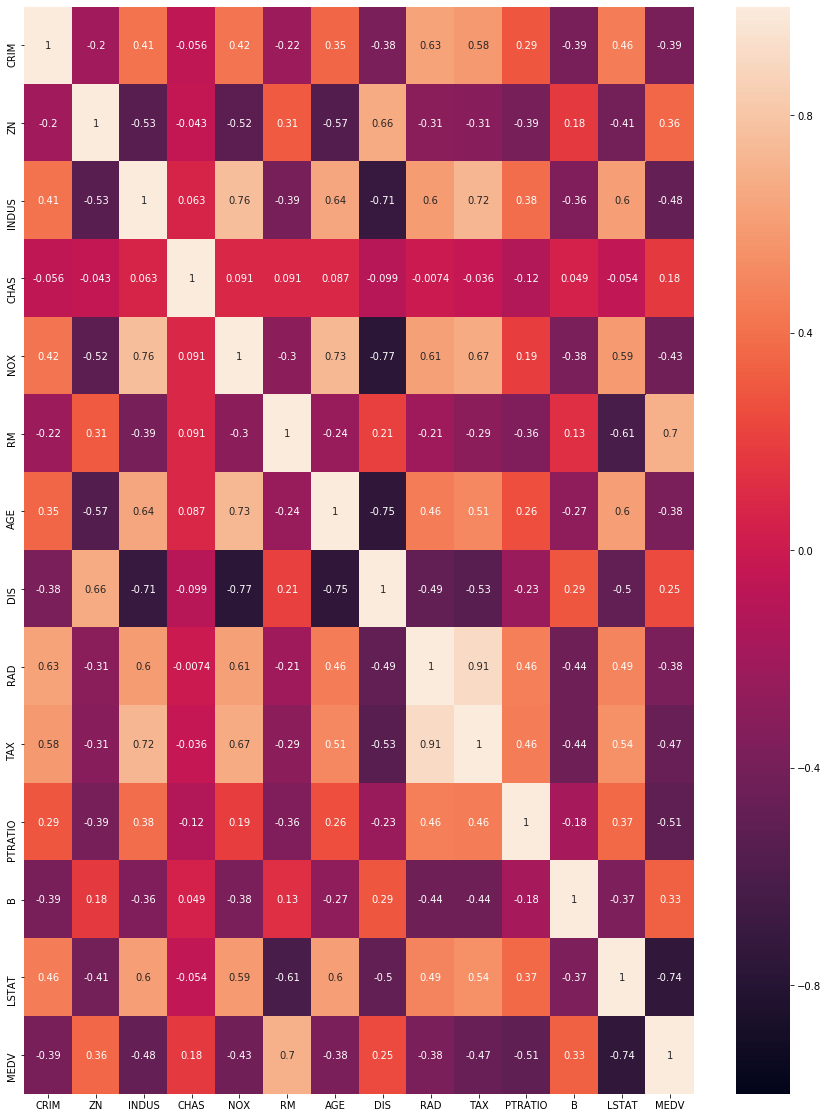

In [4]:
#2 Wytypuj 5 najbardziej obiecujących cech, na przykład na podstawie macierzy korelacji
plt.figure(figsize=(15,20))
ax = sns.heatmap(boston.corr(), annot=True, vmin=-1, vmax=1)
ax.set_ylim(len(boston.columns), 0)
plt.show()

In [5]:
#3 Pozbądź się kolumn, których nie chcesz używać
new_boston = boston[["INDUS", "RM", "TAX", "PTRATIO", "LSTAT", "MEDV"]]

In [6]:
#3cd Dokonaj podziału na zbiór uczący oraz testowy
features = ["INDUS", "RM", "TAX", "PTRATIO", "LSTAT"]

train_boston, test_boston = train_test_split(new_boston, test_size=0.2, random_state=4)

x_train, x_test = train_boston[features], test_boston[features]
y_train, y_test = train_boston["MEDV"], test_boston["MEDV"]

print(train_boston.shape)
print(test_boston.shape)

(404, 6)
(102, 6)


In [7]:
#4 Wytrenuj model DecisionTreeRegressor i sprawdź jak radzi sobie na zbiorach treningowym i testowym
lin_model = DecisionTreeRegressor()
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_predict)

print("Model performance on training data")
print(f"MSE: {mse_train}")
print()

y_test_predict = lin_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_predict)

print("Model performance on test data")
print(f"MSE: {mse_test}")
print()

Model performance on training data
MSE: 0.0

Model performance on test data
MSE: 27.729607843137256



In [8]:
#5 Wytrenuj model SVR i sprawdź jak radzi sobie na zbiorach treningowym i testowym
lin_model = SVR(gamma="auto")
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_predict)

print("Model performance on training data")
print(f"MSE: {mse_train}")
print()

y_test_predict = lin_model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_predict)

print("Model performance on test data")
print(f"MSE: {mse_test}")
print()

Model performance on training data
MSE: 48.44045284349491

Model performance on test data
MSE: 73.61358221139767



## Zadanie 2
### Grupowanie (analiza skupień)

Zadanie polega na wykorzystaniu innego algorytmu grupowania, niż *KMeans*, który został pokazany na spotkaniu, należy sprawdzić również jakie parametry dla wybranego algorytmu dają najlepsze wyniki zgodnie wybraną miarą.

Czynności które należy wykonać to kolejno:

1. Wybór algorytmu grupowania oraz metryki
2. Przeprowadzenie grupowań dla różnych wartości parametrów oraz ocena ich jakości przez wybraną metrykę

Tutaj artykuł, w którym można znaleźć więcej informacji zarówno o algorytmach grupowania dostępnych w sklearnie jak i metrykach do ich ewaluacji: https://scikit-learn.org/stable/modules/clustering.html

Nie musisz czytać całości, wystarczy, że wybierzesz jeden algorytm i jedną metrykę, np. DBSCAN oraz Davies-Bouldin Index.

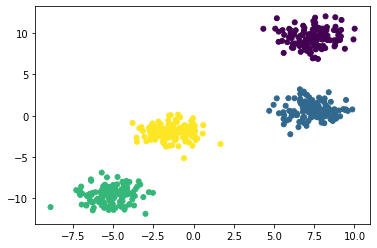

In [9]:
# Tworzymy 4 dobrze odseparowane od siebie chmury punktów, akurat random_state=8 daje dobry wynik
X, hidden = make_blobs(n_samples=500, centers=4, n_features=2, random_state=8)

# Rysujemy chmury pokolorowane na różne kolory
plt.scatter(X[:,0], X[:,1], c=hidden, marker="o", s=25)

In [10]:
#TODO: Przeszukiwanie przestrzeni parmetrów w poszukiwaniu takich, które dają najlepsze grupowanie

for e in np.logspace(-0.5, 0.75, num=6):
    for i in range(2,15,5):
        cluster_labels = DBSCAN(eps=e, min_samples=i).fit_predict(X)
        if len(np.unique(cluster_labels))>1:
            print(f"eps={e}, min_samples={i}: score ==> {davies_bouldin_score(X, cluster_labels)}")
        else:
            print(f"eps={e}, min_samples={i}: there is only one cluster")

eps=0.31622776601683794, min_samples=2: score ==> 1.215055005020723
eps=0.31622776601683794, min_samples=7: score ==> 1.2868904302499709
eps=0.31622776601683794, min_samples=12: score ==> 1.4487177875940989
eps=0.5623413251903491, min_samples=2: score ==> 1.2276037253518337
eps=0.5623413251903491, min_samples=7: score ==> 1.4705484736498282
eps=0.5623413251903491, min_samples=12: score ==> 1.78653049675446
eps=1.0, min_samples=2: score ==> 2.1071820507697607
eps=1.0, min_samples=7: score ==> 3.5443574953603303
eps=1.0, min_samples=12: score ==> 1.8782879135452837
eps=1.7782794100389228, min_samples=2: score ==> 0.30244500339937785
eps=1.7782794100389228, min_samples=7: score ==> 0.30244500339937785
eps=1.7782794100389228, min_samples=12: score ==> 0.30244500339937785
eps=3.1622776601683795, min_samples=2: score ==> 0.29534993841167934
eps=3.1622776601683795, min_samples=7: score ==> 0.29534993841167934
eps=3.1622776601683795, min_samples=12: score ==> 0.29534993841167934
eps=5.62341325

In [11]:
#TODO: Wykorzystać otrzymane parametry do uzyskania dobrego grupowania
cluster_labels = DBSCAN(eps=3, min_samples=10).fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3]


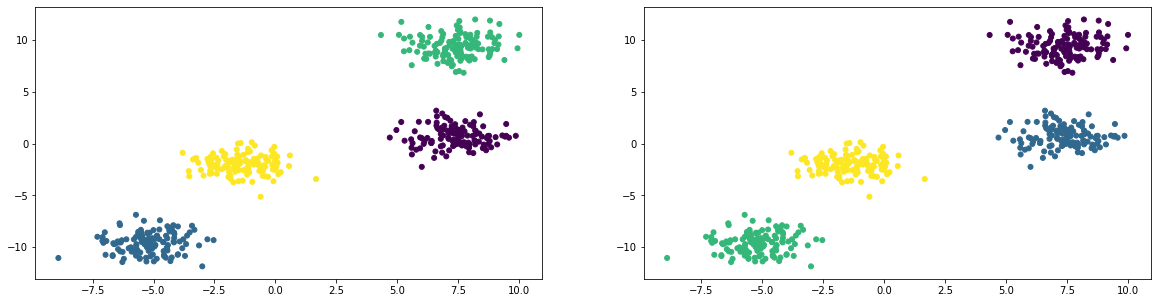

In [12]:
# Rysujemy wynik grupowania (lewy wykres) oraz faktyczne ukryte grupy (prawy wykres)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
axs[0].scatter(X[:,0], X[:,1], c=cluster_labels, marker="o", s=25)
axs[1].scatter(X[:,0], X[:,1], c=hidden, marker="o", s=25)

## Zadanie 3
### Redukcja wymiarowości z wykorzystaniem PCA

Zadanie polega na wytrenowaniu klasyfikatorów (*LogisticRegression* oraz *SVC*) na zbiorze danych MNIST.  

Pro tip: po to między innymi jest to PCA, żeby nie liczyć tego tydzień.

In [13]:
# Pobieramy MNISTa
start = time.time()
X, y = fetch_openml('mnist_784', data_home='data', version=1, return_X_y=True)
end = time.time()
print(f"Download time: {end-start}")
print(X.shape)

Download time: 18.61725878715515
(70000, 784)


In [14]:
# Normalizaujemy wartości pikseli do przedziału [0,1]
print(np.amin(X),np.amax(X))
X = X/255
print(np.amin(X),np.amax(X))

0.0 255.0
0.0 1.0


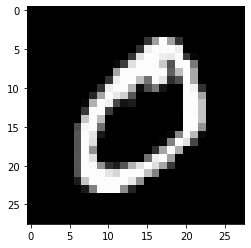

In [15]:
# Sprawdźmy jak wygląda pojedyncza cyferka
plt.imshow(X[1].reshape(28,28), cmap="gray")

In [16]:
#TODO: Tutaj nalezy wykonać PCA na zbiorze danych
pca = PCA(10)

X_pca = pca.fit_transform(X)

In [17]:
# Dzielimy zbiór danych, na zbiór uczący oraz zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=60000, test_size=10000, random_state=0)

In [18]:
start = time.time()
clf = LogisticRegression(multi_class='multinomial', solver='saga')
clf.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end-start}")

# Oceniamy skuteczność modelu na zbiorze testowym
score = clf.score(X_test, y_test)
print(f"Score: {score*100:.2f}%")

Training time: 1.3936383724212646
Score: 80.07%


In [19]:
start = time.time()
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end-start}")

# Oceniamy skuteczność modelu na zbiorze testowym
score = clf.score(X_test, y_test)
print(f"Score: {score*100:.2f}%")

Training time: 30.066765069961548
Score: 94.41%


# Gratki to koniec :D